# Dewesh Chopra
# MCA/10032/22
# CA511 - BOML Lab

# Question 1

In [1]:
import numpy as np

x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1])
y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

In [2]:
# Standardize the values
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

x_standardized = (x - x_mean) / x_std
y_standardized = (y - y_mean) / y_std

In [3]:
x_standardized

array([ 0.92627881, -1.7585873 ,  0.52354889,  0.12081898,  1.73173864,
        0.6577922 ,  0.25506228, -1.08737078, -0.41615425, -0.95312747])

In [4]:
y_standardized

array([ 0.61016865, -1.506743  ,  1.23278973,  0.36112022,  1.35731394,
        0.9837413 , -0.38602507, -1.00864614, -0.38602507, -1.25769457])

In [5]:
# Covariance matrix, eigen values and eigen vectors
data_matrix = np.vstack((x_standardized, y_standardized))
covariance_matrix = np.cov(data_matrix)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [6]:
covariance_matrix

array([[1.11111111, 1.0288103 ],
       [1.0288103 , 1.11111111]])

In [7]:
eigenvalues

array([2.13992141, 0.08230081])

In [8]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [9]:
# Sort in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [10]:
# Choose the number of principal components
num_components = 1

# Choose the top k eigenvectors
selected_eigenvectors = sorted_eigenvectors[:, :num_components]

In [11]:
# Projecting the data
transformed_data = np.dot(selected_eigenvectors.T, data_matrix)

print(transformed_data)

[[ 1.08643242 -2.3089372   1.24191895  0.34078247  2.18429003  1.16073946
  -0.09260467 -1.48210777 -0.56722643 -1.56328726]]


In [12]:
# On a kaggle dataset

# Question 2

In [13]:
x = np.array([3, 8, 9, 13, 3, 6, 11, 21, 1, 16])
y = np.array([30, 57, 64, 72, 36, 43, 59, 90, 20, 83])

In [14]:
# Calculate values
x_mean = np.mean(x)
y_mean = np.mean(y)

num = np.sum((x - x_mean) * (y - y_mean))
deno = np.sum((x - x_mean) ** 2)

slope = num / deno
intercept = y_mean - slope * x_mean

In [15]:
# Make predictions
x_test = np.array([10])
y_pred = slope * x_test + intercept

In [16]:
print(y_pred)

[58.58372806]


In [17]:
import matplotlib.pyplot as plt

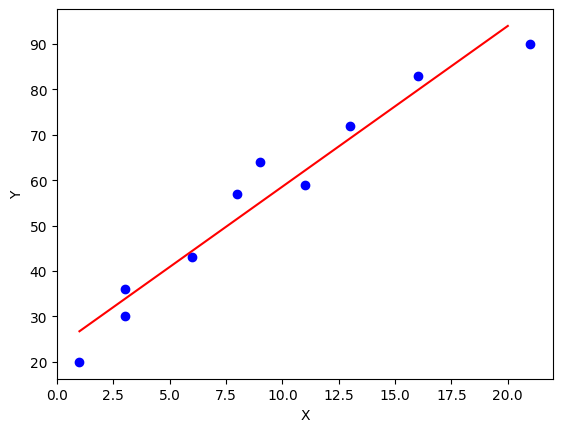

In [18]:
line_x = np.array([x for x in range(1, 21)])
line_y = np.array([slope * x + intercept for x in line_x])

plt.scatter(x, y, color='blue', label='original')
plt.plot(line_x, line_y, color='red', label='through regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [19]:
# Question 3

In [23]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 3, 2, 5])

In [24]:
# Initialize coefficients (alpha and delta)
slope = 0
intercept = 0

In [27]:
# Hyperparameters
learning_rate = 0.001
epochs = 100

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(x)):
        # Compute predictions
        y_pred = slope * x[i] + intercept

        # Compute gradients
        slope_gradient = -2 * x[i] * (y[i] - y_pred)
        intercept_gradient = -2 * (y[i] - y_pred)

        # Update coefficients
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient

In [28]:
# Make predictions on the test data
x_test = np.array([7, 12, 18])
y_pred = slope * x_test + intercept

In [29]:
print("Slope: ", slope)
print("Intercept: ", intercept)
print("Predictions: ", y_pred)

Slope:  0.7226241535599089
Intercept:  0.6252091991088057
Predictions:  [ 5.68357827  9.29669904 13.63244396]
